In [178]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
import utils
import vahadane as vhd

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
SOURCE_PATH = './data/i9.png'
TARGET_PATH = './data/i6.png'
RESULT_PATH = './output/i9_to_i6_fuck.png'

source image size:  (1536, 2048, 3)
target image size:  (1536, 2048, 3)


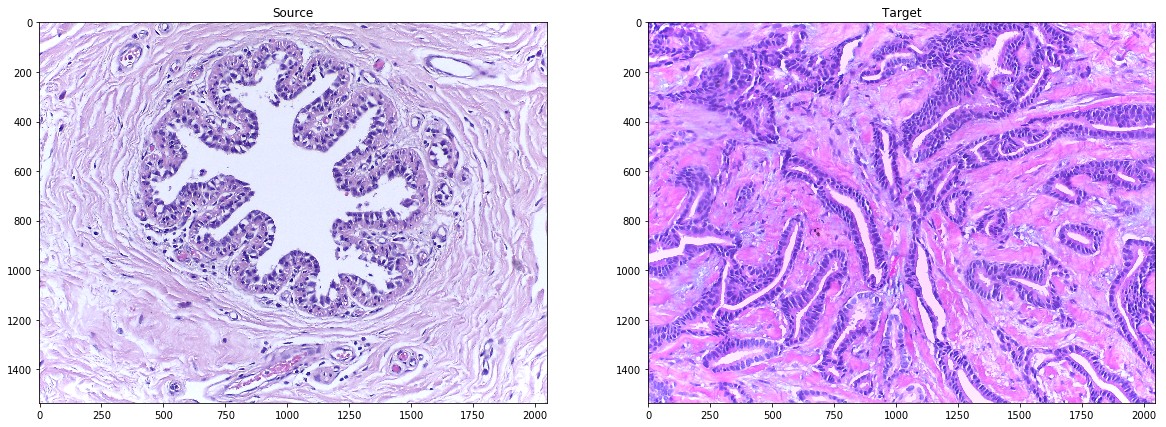

In [194]:
source_image = utils.prepare(utils.read_image(SOURCE_PATH))
target_image = utils.prepare(utils.read_image(TARGET_PATH))
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 20.0))
plt.subplot(1, 2, 1)
plt.title('Source')
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target')
plt.imshow(target_image)
plt.savefig(RESULT_PATH)
plt.show()

In [184]:
Ws, Hs = vhd.SNMF(source_image)
Wt, Ht = vhd.SNMF(target_image)

getV: 0.2983121871948242 s
[[0.60101555 0.49355064]
 [0.74400272 0.8441405 ]
 [0.29195937 0.20936712]]
getW: 1.0114238262176514 s
getH: 1.0554969310760498 s
getV: 0.33562397956848145 s
[[0.51147055 0.18255272]
 [0.85276139 0.98319117]
 [0.10581063 0.00310239]]
getW: 1.0040149688720703 s
getH: 0.9509761333465576 s


[1.27976206 1.16850117]
[1.92890618 0.84038649]


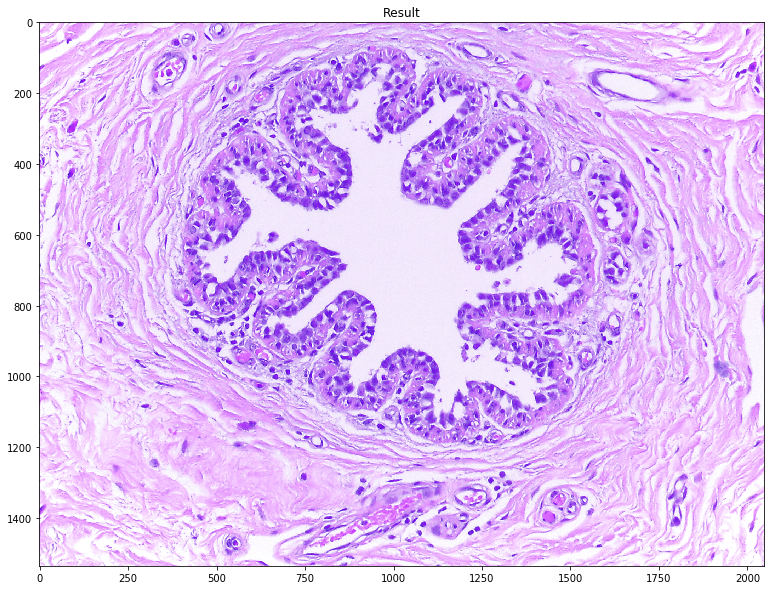

True

In [185]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result')
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(RESULT_PATH, img)